In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('Social_Network_Ads.csv')
df


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [5]:
# Searching for duplicates

df.duplicated().sum()

np.int64(33)

In [6]:
# Removing Duplicates
df.drop_duplicates(inplace = True)

In [7]:
# Finding missing values

df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
x=df[['Age','EstimatedSalary']]
y=df[['Purchased']]

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= pd.DataFrame(sc.fit_transform(x), columns = ['Age', 'EstimatedSalary'])

In [10]:
x

,Age,EstimatedSalary
0,-1.755169,-1.489408
1,-0.255190,-1.460610
2,-1.098928,-0.798259
3,-1.005180,-0.395088
4,-1.755169,0.152072
...,...,...
362,0.776045,-0.855854
363,1.244788,-1.374216
364,1.151039,-1.460610
365,-0.161442,-1.086238


In [11]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [12]:
len(x_test)

37

In [13]:
# applying the Logistic Regression model on the Training set

from sklearn.linear_model import LogisticRegression
log_cls= LogisticRegression()
log_cls.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [14]:
# Predict for myinput

myinput = pd.DataFrame(sc.transform([[46, 41000]]), columns =  ['Age', 'EstimatedSalary'])
log_cls.predict(myinput)


array([0])

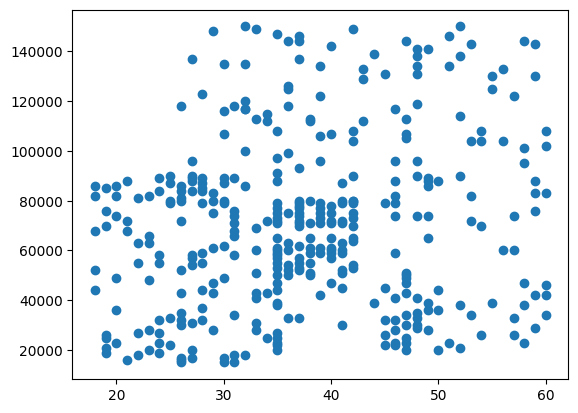

In [15]:
original_X = pd.DataFrame(sc.inverse_transform(x), columns =  ['Age', 'EstimatedSalary'])
plt.scatter(original_X["Age"], original_X["EstimatedSalary"])
plt.show()

In [16]:
# User Input

age = float(input("Enter Age: "))
salary = float(input("Enter Estimated Salary: "))

myinput = pd.DataFrame(sc.transform([[age, salary]]), columns=['Age', 'EstimatedSalary'])

result = log_cls.predict(myinput)

if result[0] == 1:
    print("Prediction: User will purchase plan")
else:
    print("Prediction: User will not purchase plan")

Enter Age:  45
Enter Estimated Salary:  50000


Prediction: User will not purchase plan


In [19]:
# Cheaking Accuracy of logistic regression model

from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = log_cls.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the logistic regression model: {accuracy * 100:.2f}%")

Accuracy of the logistic regression model: 83.78%


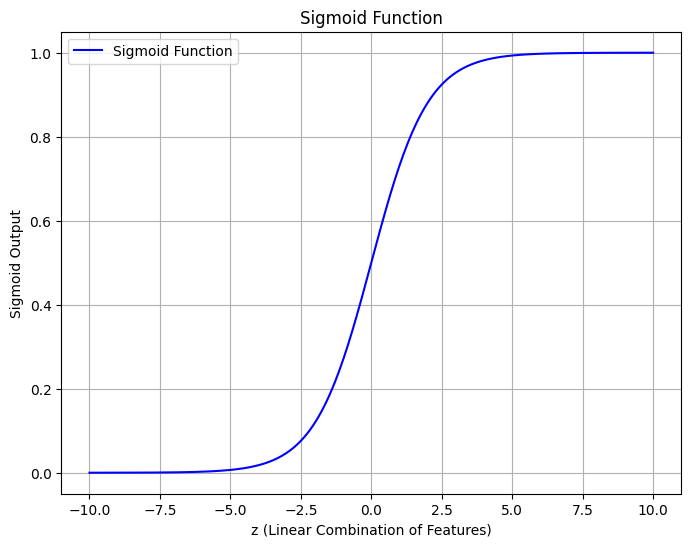

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# 1. Plot the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 400)
sigmoid_values = sigmoid(z)

plt.figure(figsize=(8, 6))
plt.plot(z, sigmoid_values, label="Sigmoid Function", color="b")
plt.title("Sigmoid Function")
plt.xlabel("z (Linear Combination of Features)")
plt.ylabel("Sigmoid Output")
plt.grid(True)
plt.legend()
plt.show()